In [8]:
import dataInterpreter as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dt.get_data('NHBE', 'sars-cov2')
#data = pd.read_csv('data/GSE147507_RawReadCounts_Human.tsv', index_col = 0, sep = '\t')[['Series1_NHBE_Mock_1', 'Series1_NHBE_Mock_2', 'Series1_NHBE_Mock_3','Series1_NHBE_SARS-CoV-2_1', 'Series1_NHBE_SARS-CoV-2_2', 'Series1_NHBE_SARS-CoV-2_3']]
#data = data.loc[(data!=0).any(axis=1)]

#data.head()


,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
DDX11L1,0.000000,0.000000,0.000000
WASH7P,3.555348,2.995732,3.806662
FAM138A,0.000000,0.000000,0.000000
FAM138F,0.000000,0.000000,0.000000
OR4F5,0.000000,0.000000,0.000000
...,...,...,...
CDY1B,0.000000,0.000000,0.000000
CDY1,0.000000,0.000000,0.000000
CSPG4P1Y,0.000000,0.000000,0.000000
GOLGA2P3Y,0.000000,0.000000,0.000000


### Simple data

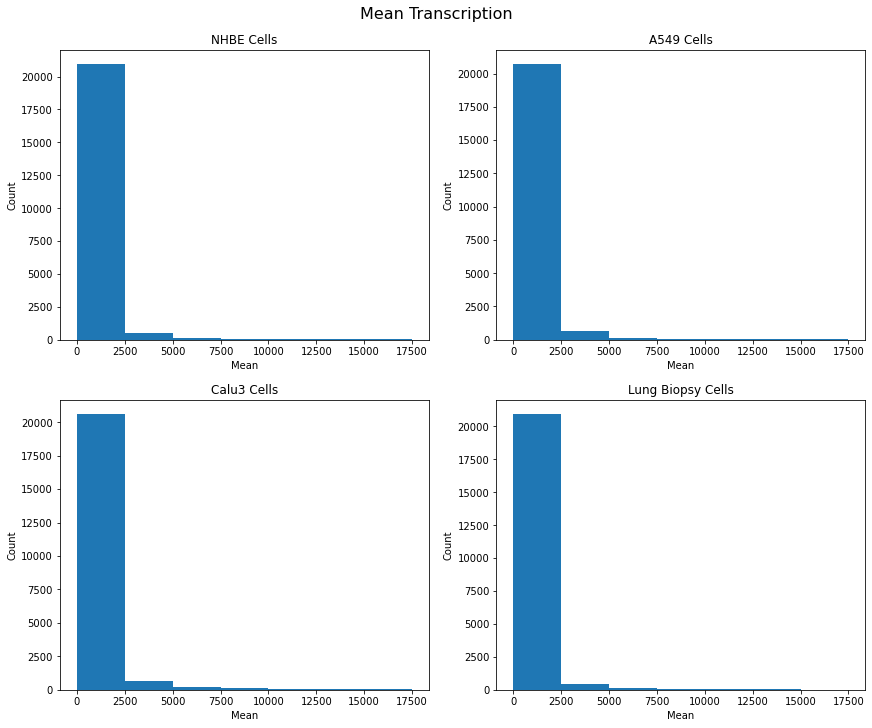

In [38]:
## NHBE
NHBE_simple_data_healthy = dt.get_data('NHBE', 'healthy', apply_log = False)
NHBE_simple_data_infected = dt.get_data('NHBE', 'sars-cov2', apply_log = False)

NHBE_simple_data = pd.concat([NHBE_simple_data_healthy, NHBE_simple_data_infected], axis = 1)

NHBE_simple_data.insert(len(NHBE_simple_data.columns), "mean", NHBE_simple_data.mean(axis = 1))

## A549
A549_simple_data_healthy = dt.get_data('A549', 'healthy', apply_log = False)
A549_simple_data_infected = dt.get_data('A549', 'sars-cov2', apply_log = False)

A549_simple_data = pd.concat([A549_simple_data_healthy, A549_simple_data_infected], axis = 1)

A549_simple_data.insert(len(A549_simple_data.columns), "mean", A549_simple_data.mean(axis = 1))

## Calu3
Calu3_simple_data_healthy = dt.get_data('Calu3', 'healthy', apply_log = False)
Calu3_simple_data_infected = dt.get_data('Calu3', 'sars-cov2', apply_log = False)

Calu3_simple_data = pd.concat([Calu3_simple_data_healthy, Calu3_simple_data_infected], axis = 1)

Calu3_simple_data.insert(len(Calu3_simple_data.columns), "mean", Calu3_simple_data.mean(axis = 1))

## biopsy
biopsy_simple_data_healthy = dt.get_data('biopsy', 'healthy', apply_log = False)
biopsy_simple_data_infected = dt.get_data('biopsy', 'sars-cov2', apply_log = False)

biopsy_simple_data = pd.concat([biopsy_simple_data_healthy, biopsy_simple_data_infected], axis = 1)

biopsy_simple_data.insert(len(biopsy_simple_data.columns), "mean", biopsy_simple_data.mean(axis = 1))


## graph
bins = np.arange(0, 20000, 2500)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Mean Transcription", fontsize=16)
axes[0][0].hist(NHBE_simple_data["mean"], bins = bins, align = "mid")
axes[0][0].set_title("NHBE Cells")
axes[0][0].set_xlabel("Mean")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)

axes[0][1].hist(A549_simple_data["mean"], bins = bins)
axes[0][1].set_title("A549 Cells")
axes[0][1].set_xlabel("Mean")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)

axes[1][0].hist(Calu3_simple_data["mean"], bins = bins, align = "mid")
axes[1][0].set_title("Calu3 Cells")
axes[1][0].set_xlabel("Mean")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)

axes[1][1].hist(biopsy_simple_data["mean"], bins = bins)
axes[1][1].set_title("Lung Biopsy Cells")
axes[1][1].set_xlabel("Mean")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins)

plt.show()

### Log transformation

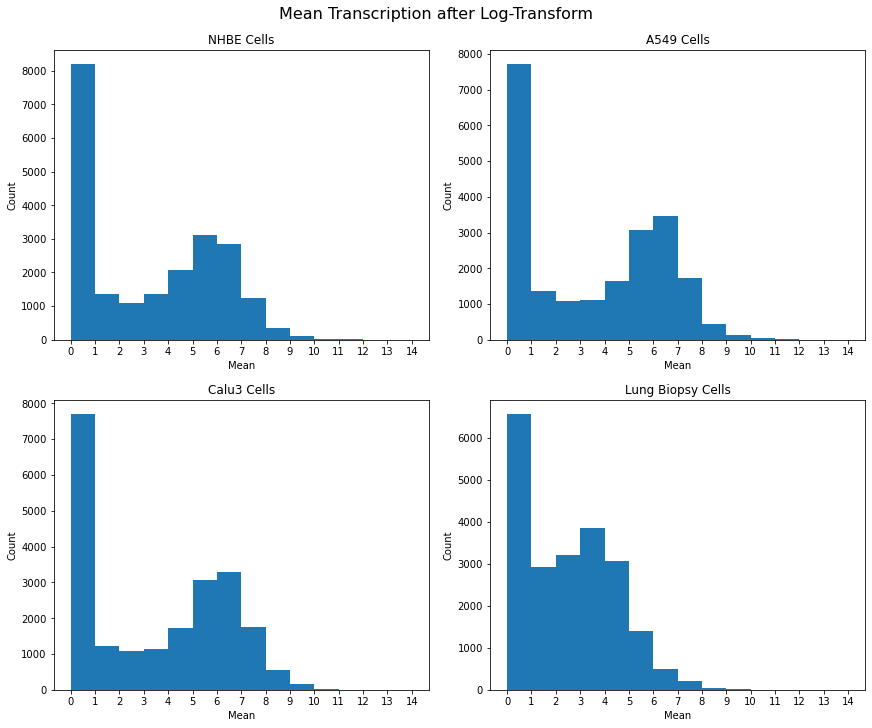

In [56]:
## NHBE
NHBE_log_data_healthy = dt.get_data('NHBE', 'healthy')
NHBE_log_data_infected = dt.get_data('NHBE', 'sars-cov2')

NHBE_log_data = pd.concat([NHBE_log_data_healthy, NHBE_log_data_infected], axis = 1)

NHBE_log_data.insert(len(NHBE_log_data.columns), "mean", NHBE_log_data.mean(axis = 1))
NHBE_log_data.insert(len(NHBE_log_data.columns), "std_healthy", NHBE_log_data_healthy.std(axis = 1))
NHBE_log_data.insert(len(NHBE_log_data.columns), "std_infected", NHBE_log_data_infected.std(axis = 1))

## A549
A549_log_data_healthy = dt.get_data('A549', 'healthy')
A549_log_data_infected = dt.get_data('A549', 'sars-cov2')

A549_log_data = pd.concat([A549_log_data_healthy, A549_log_data_infected], axis = 1)

A549_log_data.insert(len(A549_log_data.columns), "mean", A549_log_data.mean(axis = 1))
A549_log_data.insert(len(A549_log_data.columns), "std_healthy", A549_log_data_healthy.std(axis = 1))
A549_log_data.insert(len(A549_log_data.columns), "std_infected", A549_log_data_infected.std(axis = 1))

## Calu3
Calu3_log_data_healthy = dt.get_data('Calu3', 'healthy')
Calu3_log_data_infected = dt.get_data('Calu3', 'sars-cov2')

Calu3_log_data = pd.concat([Calu3_log_data_healthy, Calu3_log_data_infected], axis = 1)

Calu3_log_data.insert(len(Calu3_log_data.columns), "mean", Calu3_log_data.mean(axis = 1))
Calu3_log_data.insert(len(Calu3_log_data.columns), "std_healthy", Calu3_log_data_healthy.std(axis = 1))
Calu3_log_data.insert(len(Calu3_log_data.columns), "std_infected", Calu3_log_data_infected.std(axis = 1))

## biopsy
biopsy_log_data_healthy = dt.get_data('biopsy', 'healthy')
biopsy_log_data_infected = dt.get_data('biopsy', 'sars-cov2')

biopsy_log_data = pd.concat([biopsy_log_data_healthy, biopsy_log_data_infected], axis = 1)

biopsy_log_data.insert(len(biopsy_log_data.columns), "mean", biopsy_log_data.mean(axis = 1))
biopsy_log_data.insert(len(biopsy_log_data.columns), "std_healthy", biopsy_log_data_healthy.std(axis = 1))
biopsy_log_data.insert(len(biopsy_log_data.columns), "std_infected", biopsy_log_data_infected.std(axis = 1))


## graph
bins = np.arange(0, 15, 1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Mean Transcription after Log-Transform", fontsize=16)
axes[0][0].hist(NHBE_log_data["mean"], bins = bins, align = "mid")
axes[0][0].set_title("NHBE Cells")
axes[0][0].set_xlabel("Mean")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)

axes[0][1].hist(A549_log_data["mean"], bins = bins, align = "mid")
axes[0][1].set_title("A549 Cells")
axes[0][1].set_xlabel("Mean")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)

axes[1][0].hist(Calu3_log_data["mean"], bins = bins, align = "mid")
axes[1][0].set_title("Calu3 Cells")
axes[1][0].set_xlabel("Mean")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)

axes[1][1].hist(biopsy_log_data['mean'], bins = bins, align = "mid")
axes[1][1].set_title("Lung Biopsy Cells")
axes[1][1].set_xlabel("Mean")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins)

plt.show()

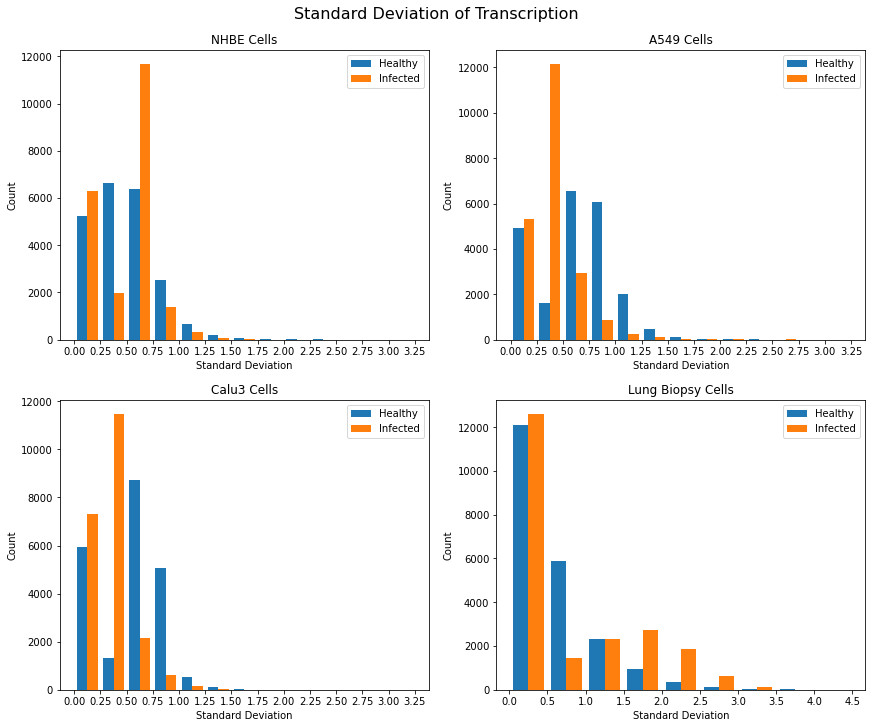

In [58]:
## graph
bins_lung = np.arange(0, 5, 0.5)
bins = np.arange(0, 3.5, 0.25)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Standard Deviation of Transcription", fontsize=16)
axes[0][0].hist([NHBE_log_data["std_healthy"], NHBE_log_data["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[0][0].set_title("NHBE Cells")
axes[0][0].set_xlabel("Standard Deviation")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)
axes[0][0].legend()

axes[0][1].hist([A549_log_data["std_healthy"], A549_log_data["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[0][1].set_title("A549 Cells")
axes[0][1].set_xlabel("Standard Deviation")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)
axes[0][1].legend()

axes[1][0].hist([Calu3_log_data["std_healthy"], Calu3_log_data["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[1][0].set_title("Calu3 Cells")
axes[1][0].set_xlabel("Standard Deviation")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)
axes[1][0].legend()

axes[1][1].hist([biopsy_log_data["std_healthy"], biopsy_log_data["std_infected"]], bins = bins_lung, align = "mid", label = ['Healthy', 'Infected'])
axes[1][1].set_title("Lung Biopsy Cells")
axes[1][1].set_xlabel("Standard Deviation")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins_lung)
axes[1][1].legend()

plt.show()

## Ferret analysis

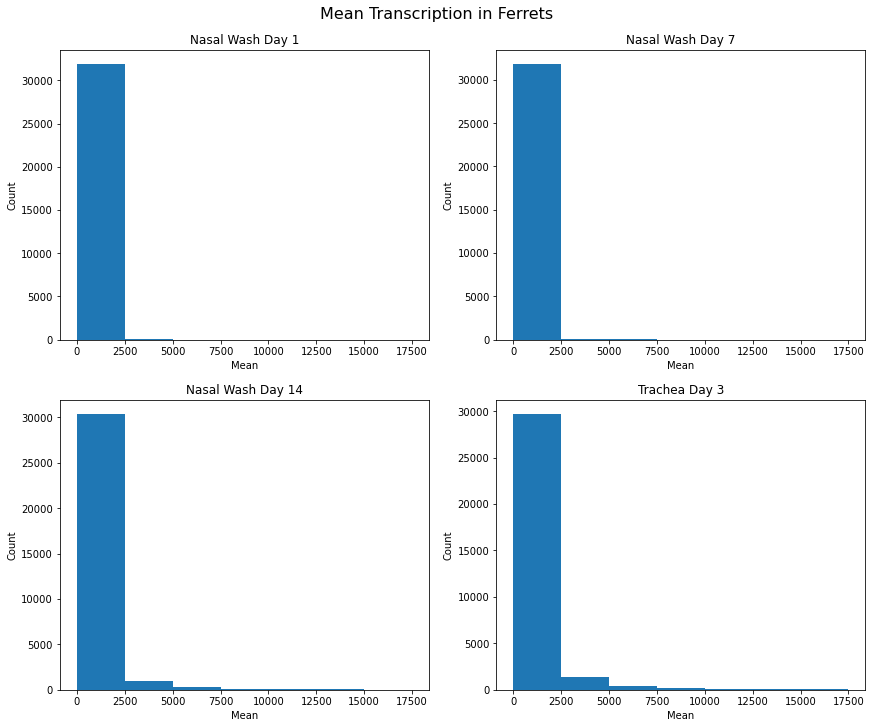

In [15]:
## Ferret Nasal Wash day 1
ferret_nw_healthy_day1 = dt.get_data('nasal_wash', 'healthy_day1', ferret = True, apply_log = False)
ferret_nw_infected_day1 = dt.get_data('nasal_wash', 'sars-cov2_day1', ferret = True, apply_log = False)

ferret_nw_day1 = pd.concat([ferret_nw_healthy_day1, ferret_nw_infected_day1], axis = 1)

ferret_nw_day1.insert(len(ferret_nw_day1.columns), "mean", ferret_nw_day1.mean(axis = 1))

## Ferret Nasal Wash day 7
ferret_nw_healthy_day7 = dt.get_data('nasal_wash', 'healthy_day7', ferret = True, apply_log = False)
ferret_nw_infected_day7 = dt.get_data('nasal_wash', 'sars-cov2_day7', ferret = True, apply_log = False)

ferret_nw_day7 = pd.concat([ferret_nw_healthy_day7, ferret_nw_infected_day7], axis = 1)

ferret_nw_day7.insert(len(ferret_nw_day7.columns), "mean", ferret_nw_day7.mean(axis = 1))

## Ferret Nasal Wash day 14
ferret_nw_healthy_day14 = dt.get_data('nasal_wash', 'healthy_day14', ferret = True, apply_log = False)
ferret_nw_infected_day14 = dt.get_data('nasal_wash', 'sars-cov2_day14', ferret = True, apply_log = False)

ferret_nw_day14 = pd.concat([ferret_nw_healthy_day14, ferret_nw_infected_day14], axis = 1)

ferret_nw_day14.insert(len(ferret_nw_day14.columns), "mean", ferret_nw_day14.mean(axis = 1))

## Ferret trachea day 3
ferret_trachea_healthy_day3 = dt.get_data('trachea', 'healthy_day3', ferret = True, apply_log = False)
ferret_trachea_infected_day3 = dt.get_data('trachea', 'sars-cov2_day3', ferret = True, apply_log = False)

ferret_trachea_day3 = pd.concat([ferret_trachea_healthy_day3, ferret_trachea_infected_day3], axis = 1)

ferret_trachea_day3.insert(len(ferret_trachea_day3.columns), "mean", ferret_trachea_day3.mean(axis = 1))

## graph
bins = np.arange(0, 20000, 2500)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Mean Transcription in Ferrets", fontsize=16)
axes[0][0].hist(ferret_nw_day1["mean"], bins = bins, align = "mid")
axes[0][0].set_title("Nasal Wash Day 1")
axes[0][0].set_xlabel("Mean")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)

axes[0][1].hist(ferret_nw_day7["mean"], bins = bins)
axes[0][1].set_title("Nasal Wash Day 7")
axes[0][1].set_xlabel("Mean")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)

axes[1][0].hist(ferret_nw_day14["mean"], bins = bins, align = "mid")
axes[1][0].set_title("Nasal Wash Day 14")
axes[1][0].set_xlabel("Mean")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)

axes[1][1].hist(ferret_trachea_day3["mean"], bins = bins)
axes[1][1].set_title("Trachea Day 3")
axes[1][1].set_xlabel("Mean")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins)

plt.show()

### Log Transform

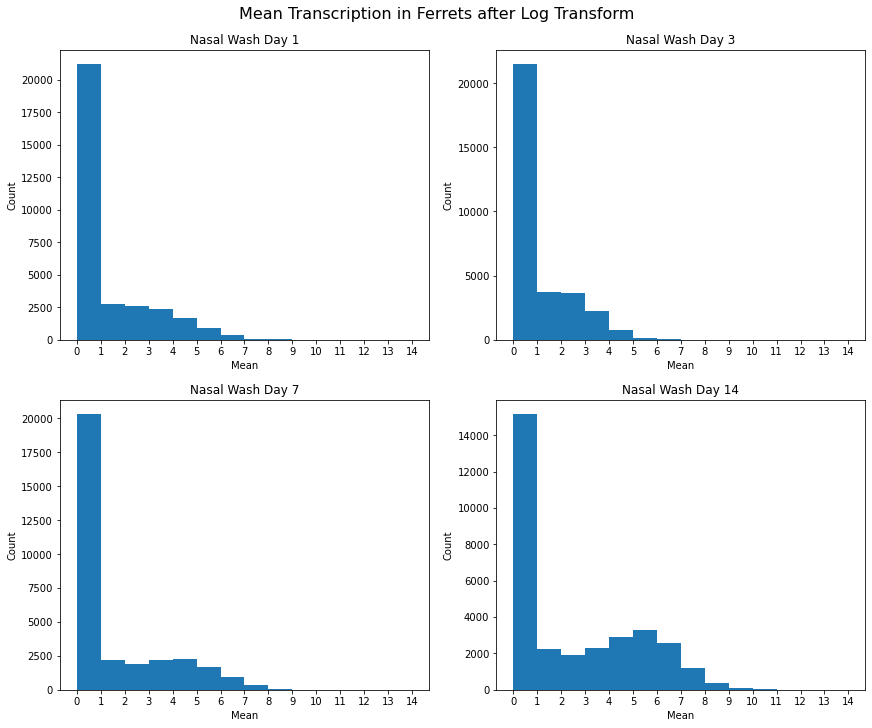

In [7]:
## Ferret Nasal Wash day 1
ferret_nw_log_healthy_day1 = dt.get_data('nasal_wash', 'healthy_day1', ferret = True)
ferret_nw_log_infected_day1 = dt.get_data('nasal_wash', 'sars-cov2_day1', ferret = True)

ferret_nw_log_day1 = pd.concat([ferret_nw_log_healthy_day1, ferret_nw_log_infected_day1], axis = 1)

ferret_nw_log_day1.insert(len(ferret_nw_log_day1.columns), "mean", ferret_nw_log_day1.mean(axis = 1))
ferret_nw_log_day1.insert(len(ferret_nw_log_healthy_day1.columns), "std_healthy", ferret_nw_log_healthy_day1.std(axis = 1))
ferret_nw_log_day1.insert(len(ferret_nw_log_infected_day1.columns), "std_infected", ferret_nw_log_infected_day1.std(axis = 1))


## Ferret Nasal Wash day 3
ferret_nw_log_healthy_day3 = dt.get_data('nasal_wash', 'healthy_day3', ferret = True)
ferret_nw_log_infected_day3 = dt.get_data('nasal_wash', 'sars-cov2_day3', ferret = True)

ferret_nw_log_day3 = pd.concat([ferret_nw_log_healthy_day3, ferret_nw_log_infected_day3], axis = 1)

ferret_nw_log_day3.insert(len(ferret_nw_log_day3.columns), "mean", ferret_nw_log_day1.mean(axis = 1))
ferret_nw_log_day3.insert(len(ferret_nw_log_healthy_day3.columns), "std_healthy", ferret_nw_log_healthy_day3.std(axis = 1))
ferret_nw_log_day3.insert(len(ferret_nw_log_infected_day3.columns), "std_infected", ferret_nw_log_infected_day3.std(axis = 1))


## Ferret Nasal Wash day 7
ferret_nw_log_healthy_day7 = dt.get_data('nasal_wash', 'healthy_day7', ferret = True)
ferret_nw_log_infected_day7 = dt.get_data('nasal_wash', 'sars-cov2_day7', ferret = True)

ferret_nw_log_day7 = pd.concat([ferret_nw_log_healthy_day7, ferret_nw_log_infected_day7], axis = 1)

ferret_nw_log_day7.insert(len(ferret_nw_log_day7.columns), "mean", ferret_nw_log_day7.mean(axis = 1))
ferret_nw_log_day7.insert(len(ferret_nw_log_healthy_day7.columns), "std_healthy", ferret_nw_log_healthy_day7.std(axis = 1))
ferret_nw_log_day7.insert(len(ferret_nw_log_infected_day7.columns), "std_infected", ferret_nw_log_infected_day7.std(axis = 1))


## Ferret Nasal Wash day 14
ferret_nw_log_healthy_day14 = dt.get_data('nasal_wash', 'healthy_day14', ferret = True)
ferret_nw_log_infected_day14 = dt.get_data('nasal_wash', 'sars-cov2_day14', ferret = True)

ferret_nw_log_day14 = pd.concat([ferret_nw_log_healthy_day14, ferret_nw_log_infected_day14], axis = 1)

ferret_nw_log_day14.insert(len(ferret_nw_log_day14.columns), "mean", ferret_nw_log_day14.mean(axis = 1))
ferret_nw_log_day14.insert(len(ferret_nw_log_healthy_day14.columns), "std_healthy", ferret_nw_log_healthy_day14.std(axis = 1))
ferret_nw_log_day14.insert(len(ferret_nw_log_infected_day14.columns), "std_infected", ferret_nw_log_infected_day14.std(axis = 1))

## graph
bins = np.arange(0, 15, 1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Mean Transcription in Ferrets after Log Transform", fontsize=16)
axes[0][0].hist(ferret_nw_log_day1["mean"], bins = bins, align = "mid")
axes[0][0].set_title("Nasal Wash Day 1")
axes[0][0].set_xlabel("Mean")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)

axes[0][1].hist(ferret_nw_log_day3["mean"], bins = bins)
axes[0][1].set_title("Nasal Wash Day 3")
axes[0][1].set_xlabel("Mean")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)

axes[1][0].hist(ferret_nw_log_day7["mean"], bins = bins, align = "mid")
axes[1][0].set_title("Nasal Wash Day 7")
axes[1][0].set_xlabel("Mean")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)

axes[1][1].hist(ferret_nw_log_day14["mean"], bins = bins)
axes[1][1].set_title("Nasal Wash Day 14")
axes[1][1].set_xlabel("Mean")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins)

plt.show()

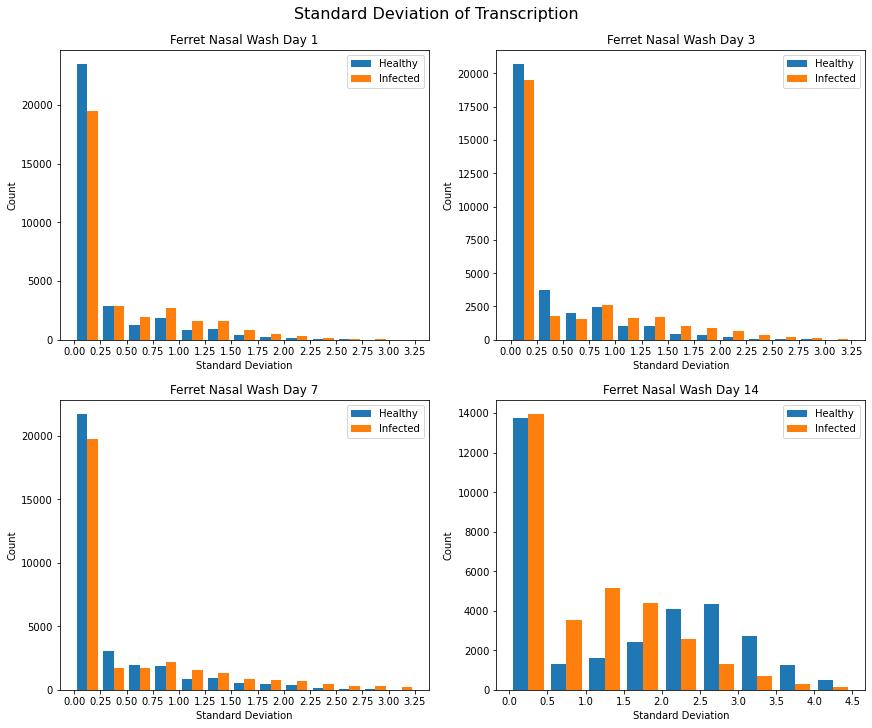

In [8]:
## graph
bins_lung = np.arange(0, 5, 0.5)
bins = np.arange(0, 3.5, 0.25)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)
fig.suptitle("Standard Deviation of Transcription", fontsize=16)
axes[0][0].hist([ferret_nw_log_day1["std_healthy"], ferret_nw_log_day1["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[0][0].set_title("Ferret Nasal Wash Day 1")
axes[0][0].set_xlabel("Standard Deviation")
axes[0][0].set_ylabel("Count")
axes[0][0].set_xticks(bins)
axes[0][0].legend()

axes[0][1].hist([ferret_nw_log_day3["std_healthy"], ferret_nw_log_day3["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[0][1].set_title("Ferret Nasal Wash Day 3")
axes[0][1].set_xlabel("Standard Deviation")
axes[0][1].set_ylabel("Count")
axes[0][1].set_xticks(bins)
axes[0][1].legend()

axes[1][0].hist([ferret_nw_log_day7["std_healthy"], ferret_nw_log_day7["std_infected"]], bins = bins, align = "mid", label = ['Healthy', 'Infected'])
axes[1][0].set_title("Ferret Nasal Wash Day 7")
axes[1][0].set_xlabel("Standard Deviation")
axes[1][0].set_ylabel("Count")
axes[1][0].set_xticks(bins)
axes[1][0].legend()

axes[1][1].hist([ferret_nw_log_day14["std_healthy"], ferret_nw_log_day14["std_infected"]], bins = bins_lung, align = "mid", label = ['Healthy', 'Infected'])
axes[1][1].set_title("Ferret Nasal Wash Day 14")
axes[1][1].set_xlabel("Standard Deviation")
axes[1][1].set_ylabel("Count")
axes[1][1].set_xticks(bins_lung)
axes[1][1].legend()

plt.show()

### LDA
#### NHBE cells

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

NHBE_healthy_lda_data = dt.get_data('NHBE', 'healthy').T
NHBE_cov2_lda_data = dt.get_data('NHBE', 'sars-cov2').T
NHBE_iav_lda_data = dt.get_data('NHBE', 'iav').T

NHBE_lda_data = pd.concat([NHBE_healthy_lda_data, NHBE_cov2_lda_data, NHBE_iav_lda_data])

classes = ['Healthy'] * len(NHBE_healthy_lda_data.index) + ['SARS-CoV-2'] * len(NHBE_cov2_lda_data.index) + ['IAV'] * len(NHBE_iav_lda_data)
classes = np.array(classes)

In [50]:
lda = LinearDiscriminantAnalysis(n_components=2)
NHBE_lda_transformed_data = lda.fit(NHBE_lda_data, classes).transform(NHBE_lda_data)
print('LDA explained variance:', lda.explained_variance_ratio_)

LDA explained variance: [0.92259181 0.07740819]


In [51]:
for e in zip(classes, NHBE_lda_transformed_data):
    print(e)

('Healthy', array([ 1.43384723, -0.59455399]))
('Healthy', array([ 1.22476597, -0.31906242]))
('Healthy', array([0.8549681 , 0.94422338]))
('Healthy', array([-1.00948821, -0.25102459]))
('Healthy', array([-0.74286987,  0.56134615]))
('Healthy', array([-1.1961129 ,  0.49553363]))
('Healthy', array([-0.76346693,  0.69237548]))
('SARS-CoV-2', array([0.915155  , 0.27091713]))
('SARS-CoV-2', array([ 0.38430876, -0.21600274]))
('SARS-CoV-2', array([ 2.47940491, -0.66991971]))
('IAV', array([-1.43474791, -2.35173076]))
('IAV', array([-0.21754106,  1.67546673]))
('IAV', array([-0.93531447, -0.49558067]))
('IAV', array([-0.99290864,  0.25801237]))


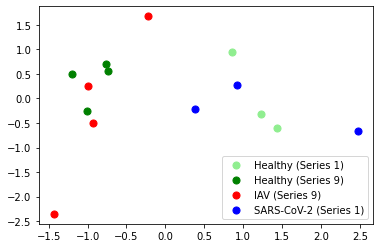

In [133]:
cdict = {'Healthy (Series 1)': 'lightgreen', 'Healthy (Series 9)': 'green', 'SARS-CoV-2 (Series 1)': 'blue', 'IAV (Series 9)': 'red'}

groups = ['Healthy (Series 1)'] * 3 + ['Healthy (Series 9)'] * 4 + ['SARS-CoV-2 (Series 1)'] * len(NHBE_cov2_pca_data.index) + ['IAV (Series 9)'] * len(NHBE_iav_pca_data.index)
groups = np.array(groups)


fig, ax = plt.subplots()
for g in np.unique(groups):
    ix = np.where(groups == g)
    ax.scatter(NHBE_lda_transformed_data.T[0][ix], NHBE_lda_transformed_data.T[1][ix], c = cdict[g], label = g, s = 50)

ax.autoscale()

ax.legend()
plt.show()

### PCA

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## NHBE
NHBE_healthy_pca_data = dt.get_data('NHBE', 'healthy').T
NHBE_cov2_pca_data = dt.get_data('NHBE', 'sars-cov2').T
NHBE_iav_pca_data = dt.get_data('NHBE', 'iav').T

NHBE_pca_data = pd.DataFrame(data = StandardScaler().fit_transform(pd.concat([NHBE_healthy_pca_data, NHBE_cov2_pca_data, NHBE_iav_pca_data])), columns = NHBE_healthy_pca_data.columns + NHBE_cov2_pca_data.columns + NHBE_iav_pca_data.columns)

pca = PCA(n_components=2)

NHBE_pca_transformed_data = pca.fit_transform(NHBE_pca_data)

pca.explained_variance_ratio_

array([0.59131319, 0.1436852 ])

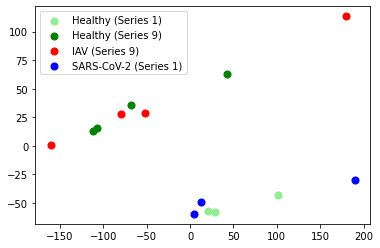

In [132]:
cdict = {'Healthy (Series 1)': 'lightgreen', 'Healthy (Series 9)': 'green', 'SARS-CoV-2 (Series 1)': 'blue', 'IAV (Series 9)': 'red'}

groups = ['Healthy (Series 1)'] * 3 + ['Healthy (Series 9)'] * 4 + ['SARS-CoV-2 (Series 1)'] * len(NHBE_cov2_pca_data.index) + ['IAV (Series 9)'] * len(NHBE_iav_pca_data.index)
groups = np.array(groups)


fig, ax = plt.subplots()
for g in np.unique(groups):
    ix = np.where(groups == g)
    ax.scatter(NHBE_pca_transformed_data.T[0][ix], NHBE_pca_transformed_data.T[1][ix], c = cdict[g], label = g, s = 50)

ax.autoscale()

ax.legend()
plt.show()

In [78]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

## NHBE
NHBE_healthy_spca_data = dt.get_data('NHBE', 'healthy').T
NHBE_cov2_spca_data = dt.get_data('NHBE', 'sars-cov2').T
NHBE_iav_spca_data = dt.get_data('NHBE', 'iav').T

NHBE_spca_data = pd.DataFrame(data = StandardScaler().fit_transform(pd.concat([NHBE_healthy_spca_data, NHBE_cov2_spca_data, NHBE_iav_spca_data])), columns = NHBE_healthy_spca_data.columns + NHBE_cov2_spca_data.columns + NHBE_iav_spca_data.columns)

spca = SparsePCA(n_components=2)

NHBE_spca_transformed_data = pca.fit_transform(NHBE_spca_data)

pca.explained_variance_ratio_

array([0.59131319, 0.1436852 ])

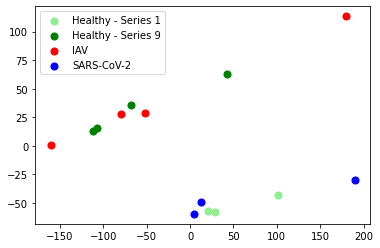

In [79]:
cdict = {'Healthy - Series 1': 'lightgreen', 'Healthy - Series 9': 'green', 'SARS-CoV-2': 'blue', 'IAV': 'red'}

groups = ['Healthy - Series 1'] * 3 + ['Healthy - Series 9'] * 4 + ['SARS-CoV-2'] * len(NHBE_cov2_pca_data.index) + ['IAV'] * len(NHBE_iav_pca_data.index)
groups = np.array(groups)


fig, ax = plt.subplots()
for g in np.unique(groups):
    ix = np.where(groups == g)
    ax.scatter(NHBE_spca_transformed_data.T[0][ix], NHBE_spca_transformed_data.T[1][ix], c = cdict[g], label = g, s = 50)

ax.autoscale()

ax.legend()
plt.show()

### UMAP

### T-Test

In [116]:
import scipy

NHBE_healthy_ttest_data = dt.get_data('NHBE', 'healthy')
NHBE_cov2_ttest_data = dt.get_data('NHBE', 'sars-cov2')

NHBE_ttest_data = pd.concat([NHBE_healthy_ttest_data, NHBE_cov2_ttest_data], axis = 1)

NHBE_ttest_data.insert(len(NHBE_ttest_data.columns), "mean", NHBE_ttest_data.mean(axis = 1))


NHBE_ttest_data = NHBE_ttest_data.loc[NHBE_ttest_data['mean'] != 0.0]

# ferret_nw_log_day7.insert(len(ferret_nw_log_day7.columns), "mean", ferret_nw_log_day7.mean(axis = 1))

pvalues = []

for index, row in NHBE_ttest_data.iterrows():
    pvalues += [scipy.stats.ttest_ind(row[NHBE_healthy_ttest_data.columns], row[NHBE_cov2_ttest_data.columns], equal_var = False).pvalue]

NHBE_ttest_data.insert(len(NHBE_ttest_data.columns), "p-value", pvalues)

In [126]:
relevant_genes = NHBE_ttest_data.sort_values(by='p-value')['p-value'].head(30)
relevant_genes.to_csv('gene_relevance.csv')

#### Ferrets

In [128]:
nasal_wash_healthy_ttest_data = dt.get_data('nasal_wash', 'healthy_day7', ferret = True)
nasal_wash_cov2_ttest_data = dt.get_data('nasal_wash', 'sars-cov2_day7', ferret = True)

nasal_wash_ttest_data = pd.concat([nasal_wash_healthy_ttest_data, nasal_wash_cov2_ttest_data], axis = 1)

nasal_wash_ttest_data.insert(len(nasal_wash_ttest_data.columns), "mean", nasal_wash_ttest_data.mean(axis = 1))


nasal_wash_ttest_data = nasal_wash_ttest_data.loc[nasal_wash_ttest_data['mean'] != 0.0]

# ferret_nw_log_day7.insert(len(ferret_nw_log_day7.columns), "mean", ferret_nw_log_day7.mean(axis = 1))

pvalues = []

for index, row in nasal_wash_ttest_data.iterrows():
    pvalues += [scipy.stats.ttest_ind(row[nasal_wash_healthy_ttest_data.columns], row[nasal_wash_cov2_ttest_data.columns], equal_var = False).pvalue]

nasal_wash_ttest_data.insert(len(nasal_wash_ttest_data.columns), "p-value", pvalues)

C:\Users\Pedro\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [129]:
ferret_relevant_genes = nasal_wash_ttest_data.sort_values(by='p-value')['p-value'].head(30)
ferret_relevant_genes.to_csv('ferret_gene_relevance.csv')